# <center>Итоговый проект "Определение социально уязвимых групп населения" #

 ## Часть 2. Анализ и отчистка данных. Разведочный анализ (EDA). ##

Импортируем необходимые библиотеки: 

In [86]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from numpy.random import seed

import pandas as pd

import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from IPython.display import display, HTML

from scipy import stats
from scipy.stats import normaltest

from sklearn import mixture
from sklearn.mixture import GaussianMixture

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn import decomposition
from sklearn.decomposition import PCA

from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

plt.rcParams["patch.force_edgecolor"] = True

### <center> 1. Анализ и отчистка данных. ###

#### 1.1. Структура и статистика данных даных.

In [87]:
#  загрузим данные проекта в df
df = pd.read_csv(
    '/home/pavel/Work/Skill_Factory_DSPR/GitHub_Projects/Final_Project/Part_1/data/sp_df_2020.csv', index_col='region')
df.head(3)

,population,area,living area,bad conditions,no funds,per_capita,real_incomes,formal_wage,real_pay,gdpp,...,employable,unemployment_rate,newborn,child_mortality_rural,child_mortality_urban,morbidity,respiratory,neoplasms,density,spec_reg_prod
region,,,,,,,,,,,,,,,,,,,,,
Алтайский край,2317153,167996,18.0,0.3,0.8642,23864,95.5,30072,103.8,291156.9,...,59.4,5.9,19976,44,53,335066,57.302,10.293,13.792906,367.883929
Амурская область,790044,361908,17.3,1.3,1.0731,35499,100.3,52430,105.2,571362.1,...,56.9,6.0,7853,13,29,164545,30.788,3.568,2.182997,512.093588
Архангельская область без Ненецкого АО,1092424,413103,16.9,1.4,1.2998,34852,98.4,52779,102.9,514200.4,...,64.3,7.4,8906,5,24,565545,88.038,16.234,2.644435,607.920547


In [88]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, Алтайский край to Ярославская область
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   population             85 non-null     int64  
 1   area                   85 non-null     int64  
 2   living area            85 non-null     float64
 3   bad conditions         85 non-null     float64
 4   no funds               85 non-null     float64
 5   per_capita             85 non-null     int64  
 6   real_incomes           85 non-null     float64
 7   formal_wage            85 non-null     int64  
 8   real_pay               85 non-null     float64
 9   gdpp                   85 non-null     float64
 10  welfare                85 non-null     float64
 11  reg_prod_total         85 non-null     float64
 12  retail                 85 non-null     int64  
 13  poverty_percent        85 non-null     float64
 14  children               85 non-null 

None

**Описание набора данных:**

 * **population** - численность населения региона (чел.);

 * **area** - площадь региона (кв.км);

 * **living area** - средняя жилая площадь на одного человека;

 * **bad conditions** - процент домохозяйств, указавших на плохое состояние жилого помещения;

 * **no funds** - процент домохозяйств, не имеющих средств для улучшения жилищных условий (процент встающих в очередь на жилье или рассчитывающих на переселение в связи со сносом дома);

 * **per capita** - среднедушевые денежные доходы (в месяц), (руб.);

 * **real_incomes** - реальные денежные доходы, в процентах к предыдущему году (покупательная способность: с учетом роста цен), (руб.);

 * **formal wage** - среднемесячная номинальная начисленная заработная плата (руб.);

 * **real_pay** - реальная начисленная заработная плата, в процентах к предыдущему году (покупательная способность: с учетом роста цен) (руб.);

 * **gdpp** - валовой региональный продукт на душу населения (руб.);
 
 * **welfare** - расходы на социальную политику от общих расходов бюджета региона (%);

 * **reg_prod_total** - общий объем регионального производства (млн.руб.);

 * **retail** - объем розничной торговли на душу населения за год (млн.руб);

 * **poverty_percent** - доля населения региона, живущих за чертой бедности (%);

 * **children** - доля детей в возрасте до 16 лет живущих за чертой бедности от населения региона (%);

 * **pensioners** - доля людей пенсионного возраста (более 60 лет) живущих за чертой бедности от населения региона (%);

 * **employable** - доля людей работоспособного возраста (16-60 лет) живущих за чертой бедности от населения региона (%);

 * **unemployment_rate** - уровень безработицы (%);

 * **newborn** - рождаемость за год (чел.);

 * **child_mortality_rural** - смертность детей в сельской местности на первом году жизни за год (чел.);

 * **child_mortality_urban** - смертность детей в городской местности на первом году жизни за год (чел.);

 * **morbidity** - число зарегистрированных заболеваний у пациентов с диагнозом, установленном впервые в жизни;

 * **respiratory** - число респираторных заболеваний (на 1 тыс. человек) за год;

 * **neoplasms** - число онкологических заболеваний (на 1 тыс. человек) за год;

 * **disabled** - число людей с инвалидностью;

 * **density** - плотность населения региона;

 
 * **spec_reg_prod** - удельный объем регионального производства на душу населения.

 


Статистика данных:

In [89]:
df.describe()

,population,area,living area,bad conditions,no funds,per_capita,real_incomes,formal_wage,real_pay,gdpp,...,employable,unemployment_rate,newborn,child_mortality_rural,child_mortality_urban,morbidity,respiratory,neoplasms,density,spec_reg_prod
count,8.500000e+01,8.500000e+01,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,8.500000e+01,...,85.000000,85.000000,85.000000,85.000000,85.000000,8.500000e+01,85.000000,85.000000,85.000000,85.000000
mean,1.726454e+06,2.168148e+05,17.154118,1.603529,1.166380,33020.517647,98.942353,45361.082353,103.483529,6.676350e+05,...,55.656471,7.031765,16891.176471,22.541176,53.800000,4.820395e+05,97.169518,13.943447,137.844612,1140.387938
std,1.813677e+06,4.591132e+05,2.286167,1.613665,1.575418,14912.478645,2.796272,19827.022626,2.003559,8.135611e+05,...,5.993974,4.098293,18355.295583,27.277914,61.775669,9.795904e+05,184.868590,29.783420,673.644606,1776.882155
min,4.411100e+04,8.640000e+02,13.600000,0.000000,0.000000,16877.000000,92.500000,29083.000000,98.600000,1.421997e+05,...,42.300000,2.400000,537.000000,0.000000,1.000000,1.193000e+03,0.549000,0.030000,0.069701,16.871759
25%,7.334980e+05,2.999700e+04,15.800000,0.600000,0.000000,24864.000000,97.300000,33139.000000,102.400000,3.428112e+05,...,51.500000,4.900000,6642.000000,8.000000,20.000000,1.170680e+05,20.319000,2.168000,4.364506,415.546231
50%,1.160445e+06,7.148800e+04,16.900000,1.100000,0.568000,28596.000000,98.600000,37820.000000,103.200000,4.607202e+05,...,54.700000,5.900000,10584.000000,13.000000,32.000000,2.561820e+05,50.883000,5.898000,22.356295,707.304786
75%,2.317153e+06,1.679960e+05,18.100000,1.900000,1.590300,33149.000000,100.400000,48286.000000,104.200000,5.829507e+05,...,59.300000,7.700000,19663.000000,29.000000,66.000000,4.877480e+05,95.112000,13.605000,44.511357,1153.897710
max,1.267808e+07,3.083523e+06,27.800000,8.800000,6.588600,89928.000000,110.900000,120641.000000,111.600000,5.206287e+06,...,73.600000,30.000000,123524.000000,181.000000,440.000000,8.174015e+06,1480.172000,246.383000,4950.440843,11922.452715


В таблице выше можно сделать следующие наблюдения:

    * колличество субъектов РФ -85;

    * средняя жилая площадь на 1 человека - 17.15 кв.м.;

    * среднедушевой доход по стране 33020 руб.;

    * в среднем 15% населения живут за чертой бедности, из них  37% дети.

    * максимальная плотность населения региона - 4950 чел./кв.км.(требует уточнения).

#### 1.2. Выбор признаков для модели кластеризации. ####

Для кластеризации регионов по уровню социального благополучия выберем следующие признаки:

 * ***density***- плотность населения региона;

 * ***per capita*** - среднедушевые денежные доходы (в месяц), (руб.);

 * ***formal wage*** - среднемесячная номинальная начисленная заработная плата (руб.);

 * ***gdpp*** - валовой региональный продукт на душу населения (руб.);

 * ***welfare*** - расходы на социальную политику от общих расходов бюджета региона (%);

 * ***retail*** - объем розничной торговли на душу населения за год (млн.руб);
  
 * ***poverty_percent*** - доля населения региона, живущих за чертой бедности (%);
  
 * ***unemployment_rate*** - уровень безработицы (%);

 * ***spec_reg_prod*** - удельный объем регионального производства на душу населения.

In [90]:
# создадим список выбранных признаков
columns = ['density', 'per_capita', 'formal_wage', 'gdpp', 'welfare', 'retail', 'poverty_percent', 'unemployment_rate', 'spec_reg_prod']

# соберем набор данных с выбранными признаками
model_df = df.loc[:, columns]
model_df.head(3)

,density,per_capita,formal_wage,gdpp,welfare,retail,poverty_percent,unemployment_rate,spec_reg_prod
region,,,,,,,,,
Алтайский край,13.792906,23864,30072,291156.9,29.7,153605,17.5,5.9,367.883929
Амурская область,2.182997,35499,52430,571362.1,21.7,245233,15.2,6.0,512.093588
Архангельская область без Ненецкого АО,2.644435,34852,52779,514200.4,21.4,250033,12.3,7.4,607.920547


### <center> 2. Разведочный анализ (EDA).

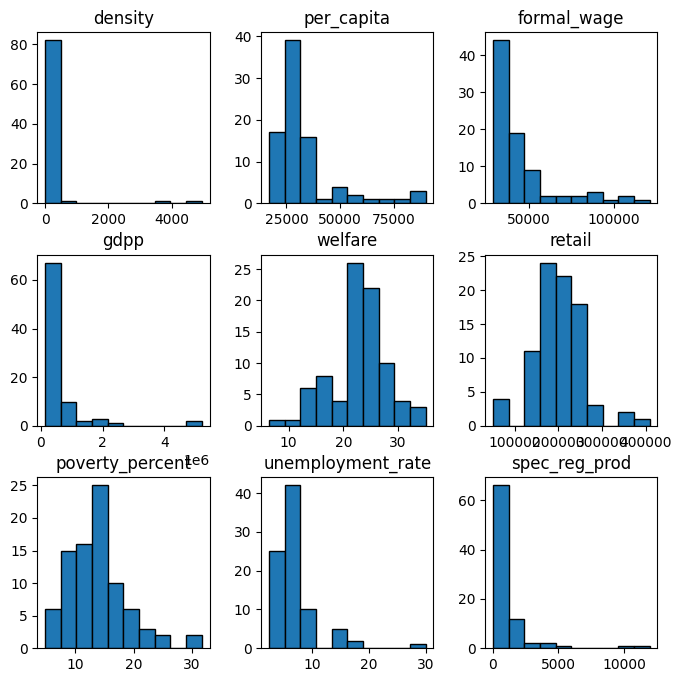

In [91]:
# визуализируем распределение признаков
model_df.hist(figsize=(8, 8), grid = False);
plt.show()

Не все гистограммы имеют симметричный вид, что говорит о наличие нескольких групп.

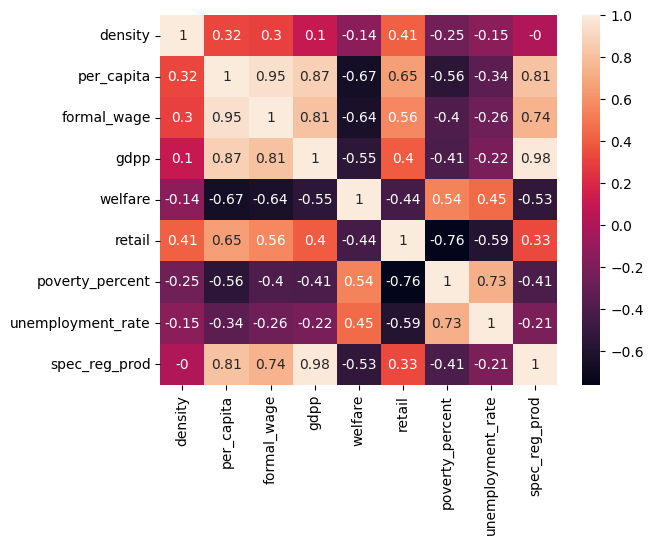

In [92]:
# создадим визуализацию значении матрицы корреляции всех пар признаков в виде тепловой карты

sns.heatmap(model_df.corr().round(decimals=2), annot=True)
plt.show()

Признаки ***gdpp***(валовой региональный продукт) и ***spec_reg_prod***(удельный объем регионального производства на душу населения) и  ***per_capita*** (среднедушевые денежные доходы) и ***formal wage***(среднемесячная номинальная начисленная заработная плата) имеют сильную линейную зависимость со значением корреляции 0,98 и 0,95, один из таких признаков можно убрать для обучения, так как они  практически одинаковые. Напротив признаки ***welfare***(расходы на социальную политику)  и ***per_capita*** (среднедушевые денежные доходы), ***retail*** (объем розничной торговли) и ***poverty_percent*** (доля населения региона, живущих за чертой бедности) имеют обратную корреляцию со значением -0,67 и -0.75.

Удалим из набора признаки ***spec_reg_prod*** и ***formal wage***. 

In [93]:
model_df = model_df.drop(['spec_reg_prod', 'formal_wage'], axis=1)
model_df.shape

(85, 7)

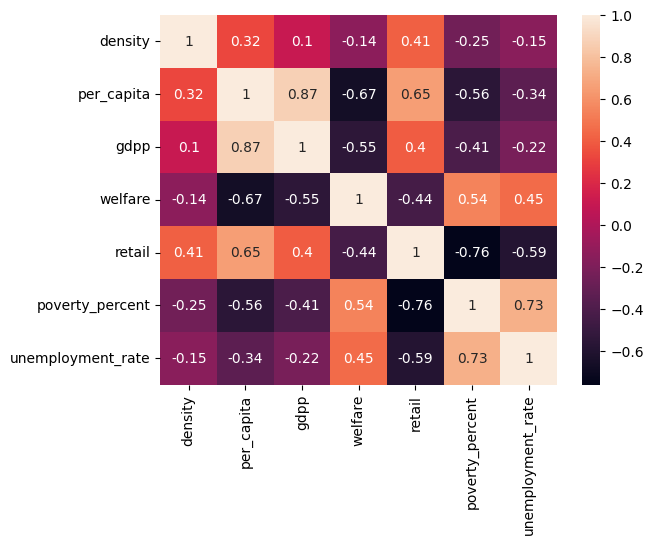

In [94]:
# повторно визуализируем матрицу корреляции всех пар признаков в виде тепловой карты

sns.heatmap(model_df.corr().round(decimals=2), annot=True)
plt.show()

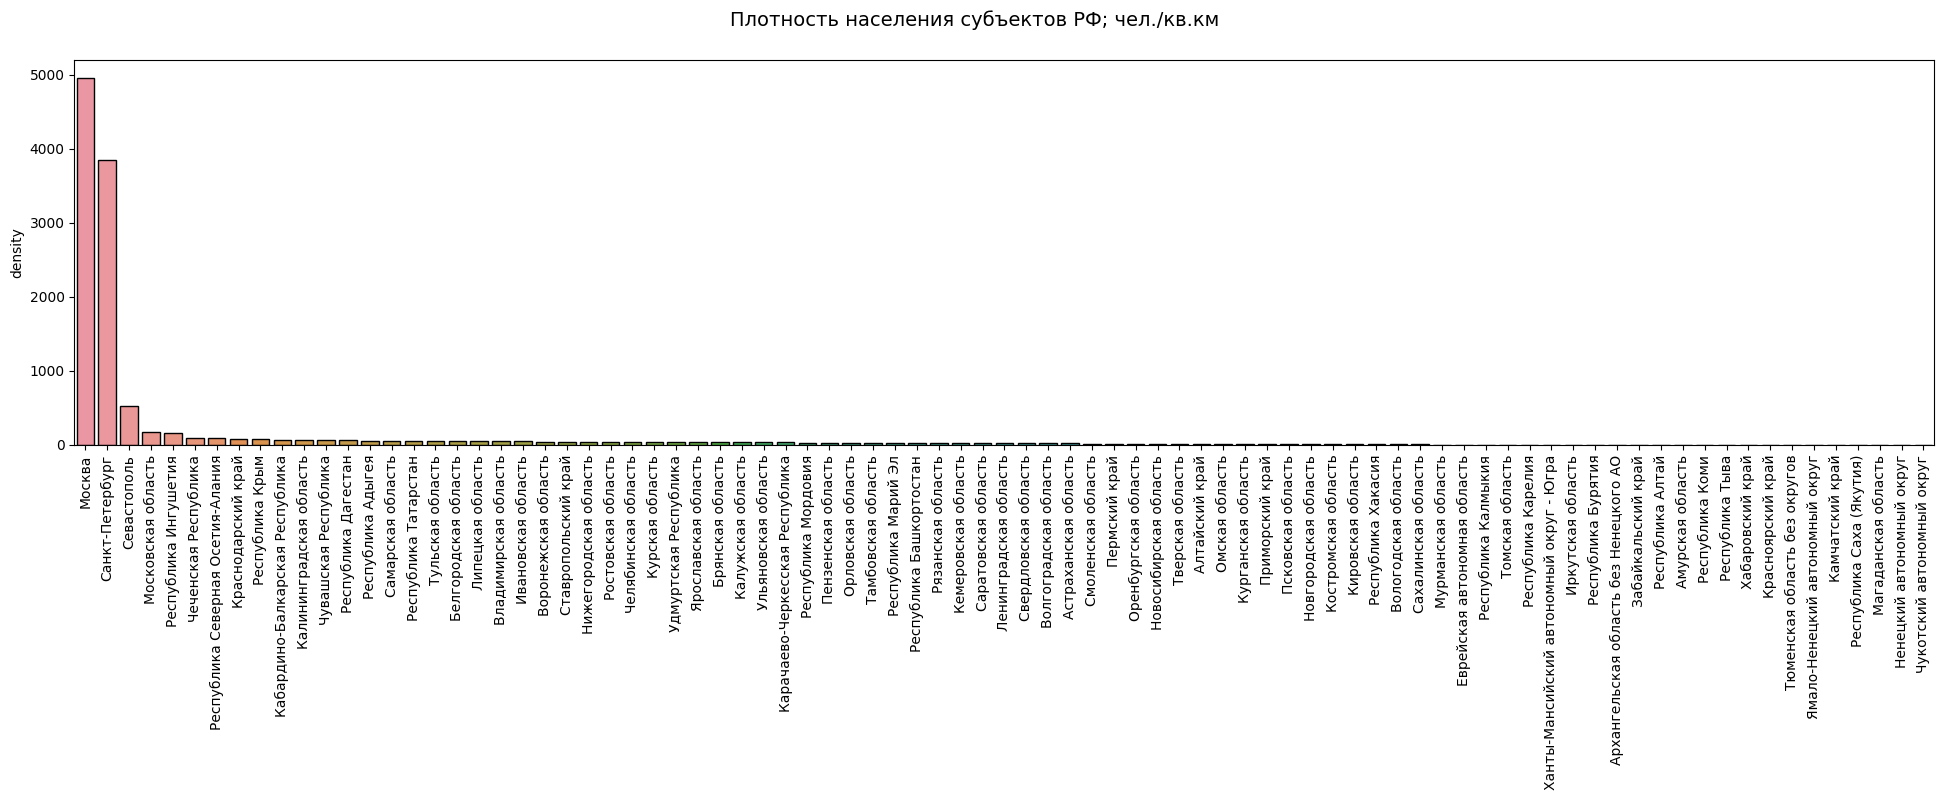

In [95]:
# посмотрим график распределения плотности населения
bar_pl_df = df.sort_values(by='density', ascending=False)
fig = plt.figure(figsize=(24,5))
sns.barplot(
    data=bar_pl_df,
    x=bar_pl_df.index,
    y='density'
);
fig.suptitle(
    'Плотность населения субъектов РФ; чел./кв.км',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

Плотность 4950 чел./кв.км соответствеут Москве, что соответсвует действительности.

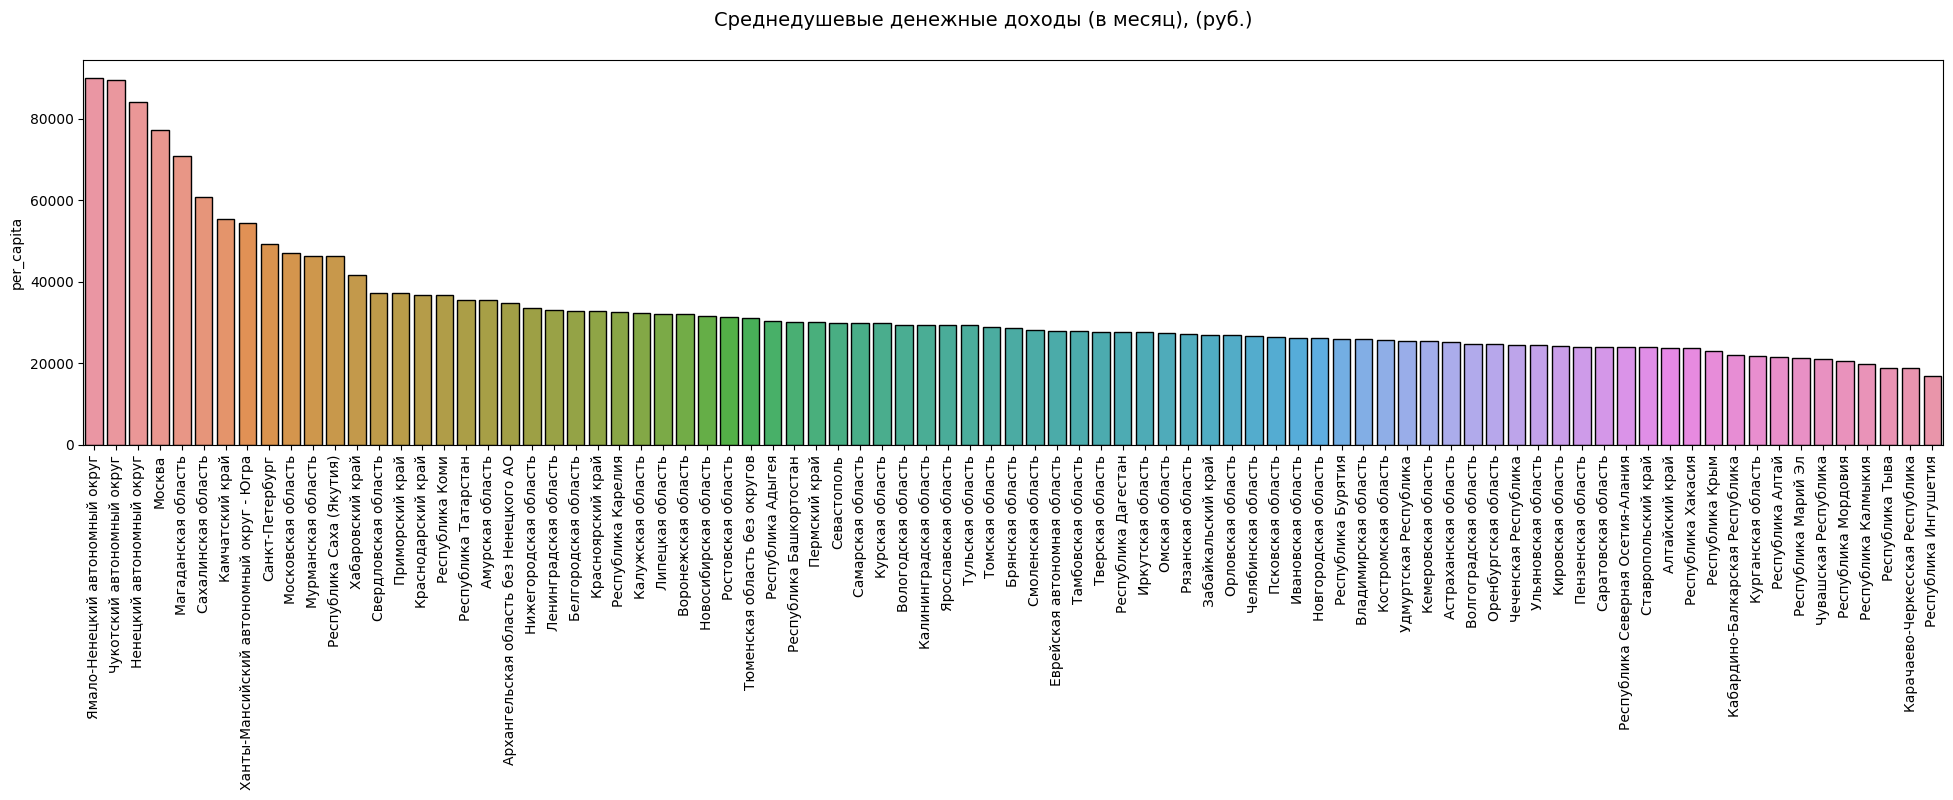

In [96]:
# посмотрим график распределения среднедушевых доходов населения
bar_pl_df = df.sort_values(by='per_capita', ascending=False)
fig = plt.figure(figsize=(24,5))
sns.barplot(
    data=bar_pl_df,
    x=bar_pl_df.index,
    y='per_capita'
);
fig.suptitle(
    'Среднедушевые денежные доходы (в месяц), (руб.)',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

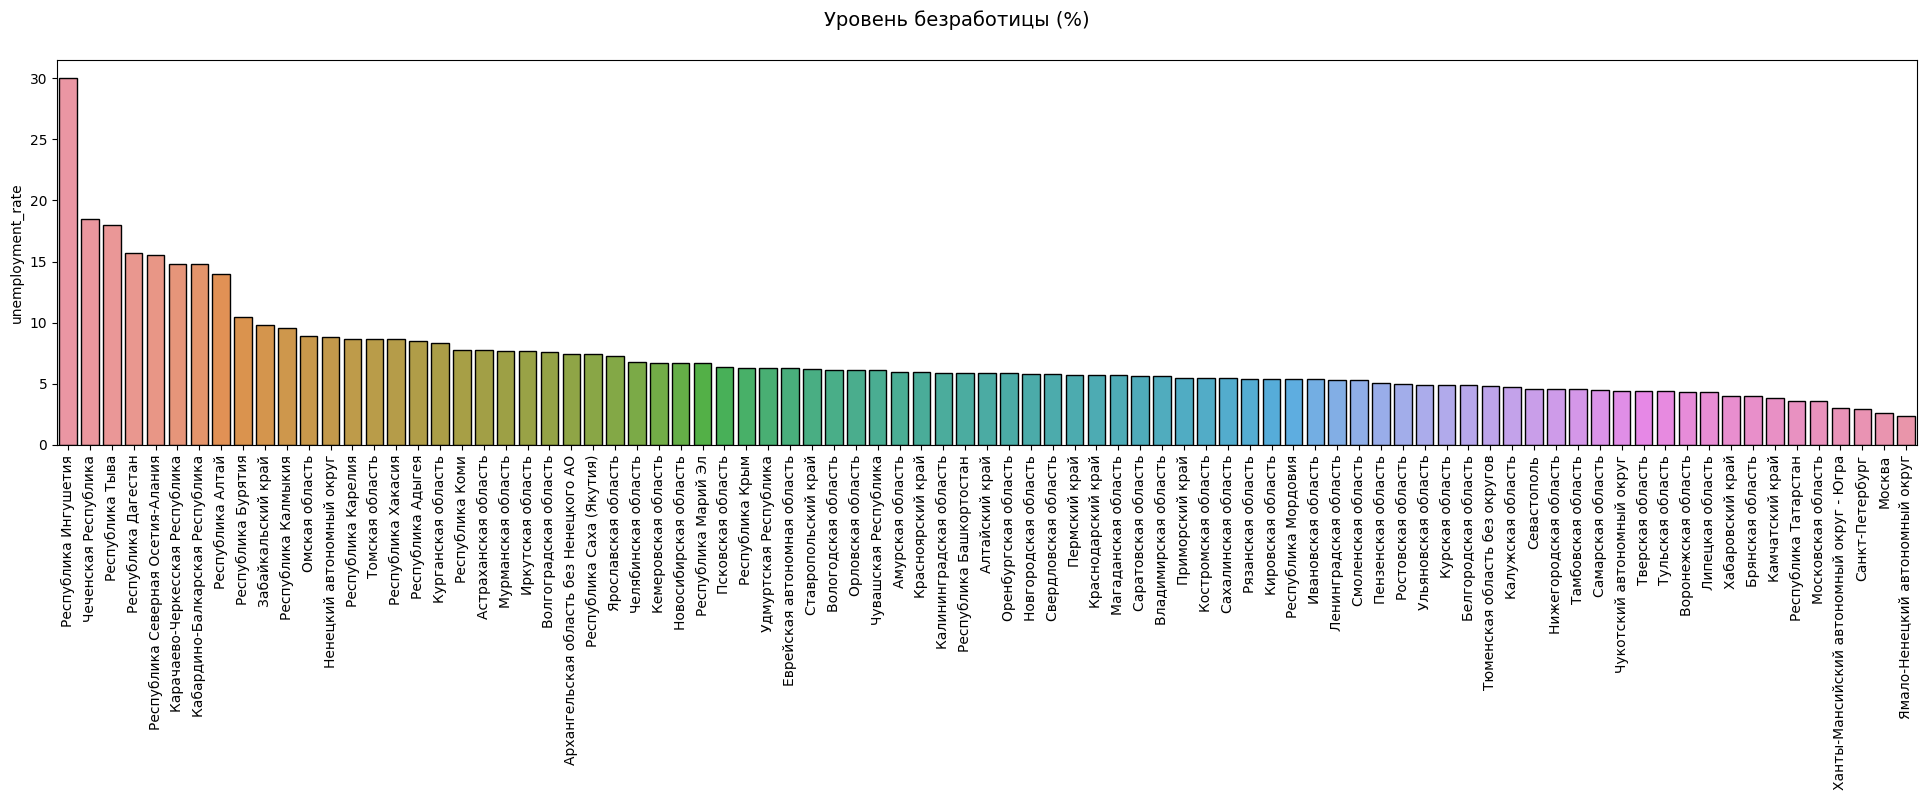

In [97]:
# посмотрим график распределения среднедушевых доходов населения
bar_pl_df = df.sort_values(by='unemployment_rate', ascending=False)
fig = plt.figure(figsize=(24,5))
sns.barplot(
    data=bar_pl_df,
    x=bar_pl_df.index,
    y='unemployment_rate'
);
fig.suptitle(
    'Уровень безработицы (%)',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

Из графиков выше видно, что для регионов с очень низкой и очень высокой плотностью населения и высокими среднедушевыми доходами характерен низкий уровень безработицы. Что может свидетельствовать о разных причинах этой зависимости. Источник доходов региона и, как следствие, сфера занятости могут влиять на распределение регионов по группам социального благополучия.

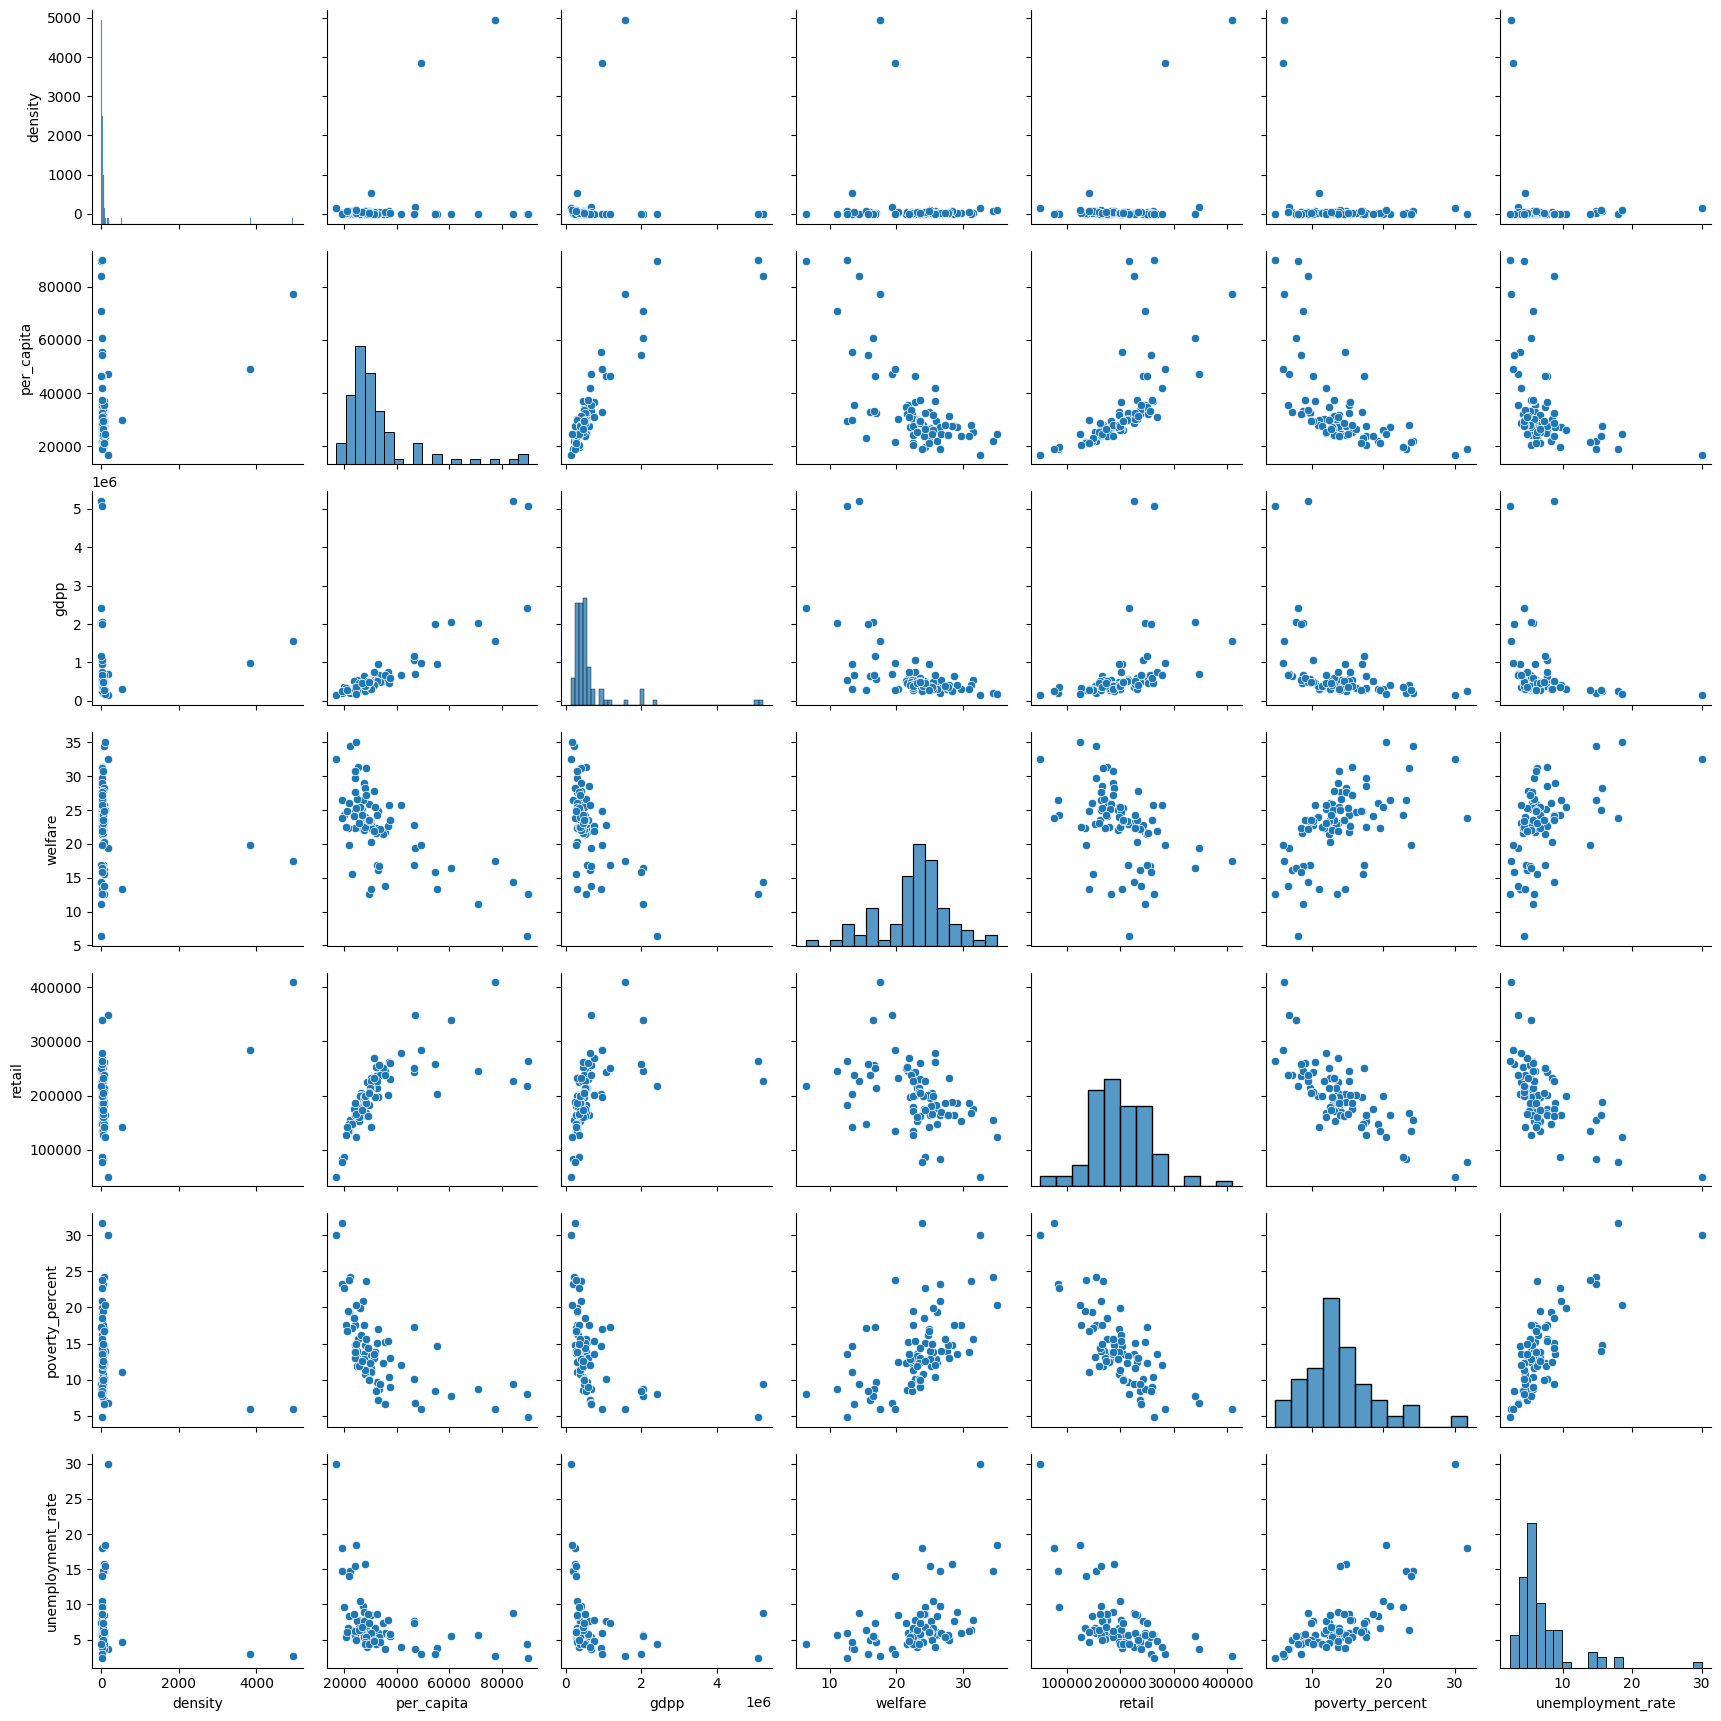

In [98]:
# Создадим матрицу диаграмм разброса для признаков
sns.pairplot(model_df)

Как и на тепловой карте корреляции, пары переменных имеют сильную линейную связь, а другие - обратную линейную связь. Так доходы населения обратно связаны с расходами на соц. политику.

### <center> 3. Cохранение данных.

In [99]:
model_df.to_csv('./data/model_df.csv')